In [3]:
import glob

import h5py

In [8]:
%ll ../..

total 25971624
drwxr-xr-x 12 zaccharie        4096 avril 29 21:37 astra-toolbox/
drwxr-xr-x  6 zaccharie        4096 juin  28 14:25 fastmri-reproducible-benchmark/
drwxr-xr-x  9 zaccharie        4096 mai    8 19:45 learned_primal_dual/
drwxr-xr-x  3 zaccharie        4096 juin  28 13:03 local-machine-setup/
drwxr-xr-x  9 zaccharie        4096 mai   15 22:00 ModOpt/
drwxr-xr-x 16 zaccharie        4096 mai   15 20:56 nfft-3.5.0/
-rw-r--r--  1 zaccharie     5175253 janv. 28 14:38 nfft-3.5.0.tar.gz
drwxr-xr-x 11 zaccharie        4096 mai   15 19:24 odl/
-rw-r--r--  1 zaccharie          27 avril  1 18:58 package-lock.json
drwxr-xr-x 11 zaccharie        4096 juin  28 14:23 pysap/
drwxr-xr-x  5 zaccharie        4096 juin  28 14:23 pysap-astro/
drwxr-xr-x  9 zaccharie        4096 mai   15 12:16 pysap-mri/
drwxr-xr-x  2 zaccharie        4096 juin  17 19:11 singlecoil_test/
-rw-r--r--  1 zaccharie 26589691904 juin  28 14:36 singlecoil_train.tar.gz
drwxr-xr-x  2 zaccharie       12288 nov.  23  201

In [9]:
val_path = '../../singlecoil_val/'
test_path = '../../singlecoil_test/'

In [10]:
filenames = glob.glob(test_path + '*')

In [25]:
def from_file_to_mask_and_kspace(filename):
    h5_obj = h5py.File(filename)
    mask = h5_obj['mask'][()]
    kspace = h5_obj['kspace'][()]
    return mask, kspace

In [62]:
def af(mask):
    return len(mask) / sum(mask)

def af_from_file(file):
    mask, _ = from_file_to_mask_and_kspace(file)
    return af(mask)

In [52]:
file_0 = filenames[0]
mask, kspace = from_file_to_mask_and_kspace(file_0)

In [53]:
mask.shape

(368,)

In [54]:
kspace.shape

(37, 640, 368)

In [55]:
import numpy as np

In [56]:
for i in range(36):
    for j in range(372):
        if not mask[j] and np.linalg.norm(kspace[i, :, j]) != 0:
            print(np.linalg.norm(kspace[i, :, j]))
            print('Fail')
            print(i, j)
            break

In [57]:
%matplotlib nbagg
import matplotlib.pyplot as plt

In [58]:
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['image.cmap'] = 'gray'

In [70]:
len(mask) / np.sum(mask)

7.829787234042553

In [71]:
np.sum(mask)

47

<IPython.core.display.Javascript object>


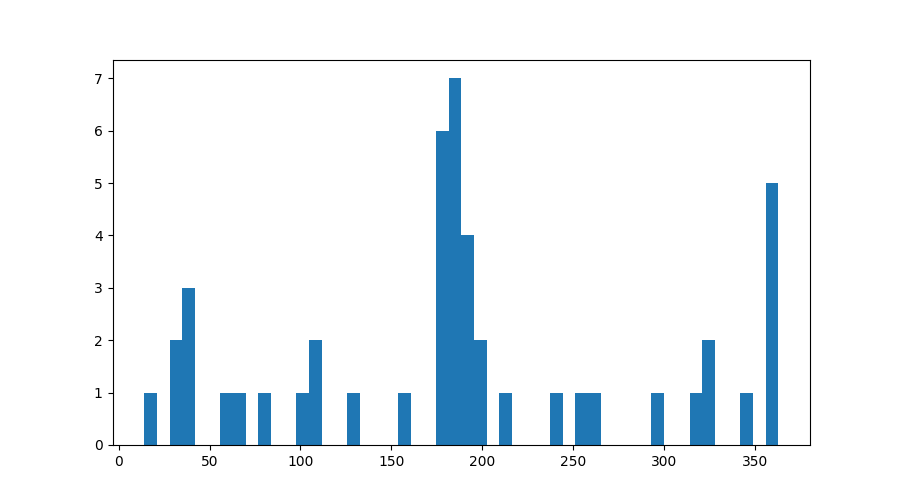

(array([1., 0., 2., 3., 0., 0., 1., 1., 0., 1., 0., 0., 1., 2., 0., 0., 1.,
        0., 0., 0., 1., 0., 0., 6., 7., 4., 2., 0., 1., 0., 0., 0., 1., 0.,
        1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 2., 0., 0., 1., 0., 5.]),
 array([ 14.  ,  20.98,  27.96,  34.94,  41.92,  48.9 ,  55.88,  62.86,
         69.84,  76.82,  83.8 ,  90.78,  97.76, 104.74, 111.72, 118.7 ,
        125.68, 132.66, 139.64, 146.62, 153.6 , 160.58, 167.56, 174.54,
        181.52, 188.5 , 195.48, 202.46, 209.44, 216.42, 223.4 , 230.38,
        237.36, 244.34, 251.32, 258.3 , 265.28, 272.26, 279.24, 286.22,
        293.2 , 300.18, 307.16, 314.14, 321.12, 328.1 , 335.08, 342.06,
        349.04, 356.02, 363.  ]),
 <a list of 50 Patch objects>)

In [69]:
plt.figure()
plt.hist(np.where(mask), bins=50)

In [63]:
afs = [af_from_file(file) for file in filenames]

<IPython.core.display.Javascript object>


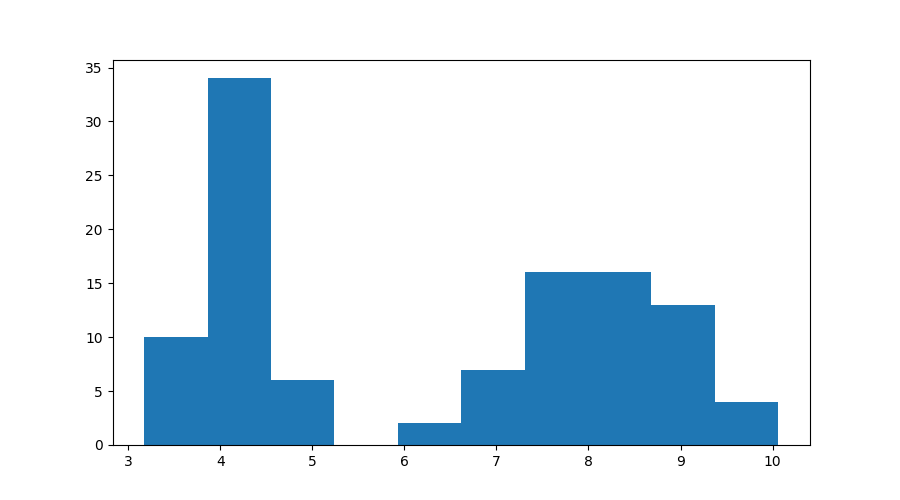

(array([10., 34.,  6.,  0.,  2.,  7., 16., 16., 13.,  4.]),
 array([ 3.17241379,  3.86142241,  4.55043103,  5.23943966,  5.92844828,
         6.6174569 ,  7.30646552,  7.99547414,  8.68448276,  9.37349138,
        10.0625    ]),
 <a list of 10 Patch objects>)

In [68]:
plt.figure()
plt.hist(afs)